# Assignment 1 - Deep learning - CT5145
## ID: 22240224
## Name: Daniel Verdejo
___

### Part 1 - Implement Logistic Regression
— Use Jupyter Notebook to implement a neural network
approach to logistic regression (no hidden layers, one output node)
— Your code must handle different numbers of inputs and different numbers
of training cases, but you don't have to support more than one output node

```

Sounds like we need a Perceptron here, should be some class object which we can instatiate its properties (i.e. learning rate, activation fn, potentially additional config)

1  
   \
    b
      \
x1 -w1-( f(sum(x•w) + b) ) -> ŷ
 .    /    
 .  wn
 . /
xn
```

In [131]:
from __future__ import annotations

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split


In [146]:
# import data
df = pd.read_csv('data/blobs400.csv')
print(df.shape)
df.head(5)

(400, 4)


,X1,X2,X3,Class
0,1.418221,2.124375,-0.433905,1
1,1.590404,0.935434,1.510369,1
2,2.311458,-1.026668,1.031930,1
3,1.186782,0.591894,0.563649,1
4,1.661888,4.047231,0.987049,0


First 5 elements of X & y: 
X: [[ 1.41822079  2.12437503 -0.43390534]
 [ 1.59040428  0.93543417  1.5103687 ]
 [ 2.31145761 -1.02666778  1.03193048]
 [ 1.18678243  0.59189372  0.56364925]
 [ 1.66188795  4.04723085  0.98704925]] 
 y: [1 1 1 1 0]


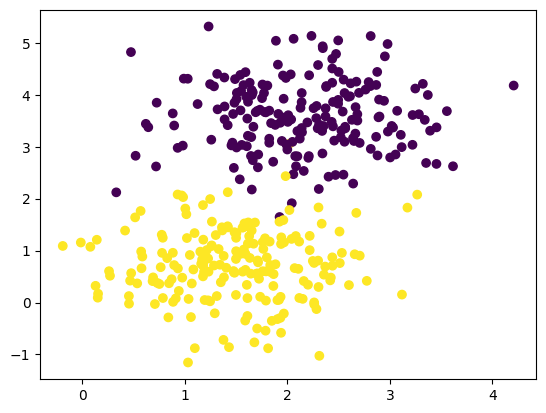

In [133]:
# split our dataset into samples and outputs

X = df.loc[:, df.columns!='Class'].to_numpy() # strip away the class
y = df['Class'].to_numpy()

print(f'First 5 elements of X & y: \nX: {X[0:5, :]} \n y: {y[0:5]}')

plt.scatter(X[:,0], X[:,1], c=y)


In [134]:
# do some data splitting

X_train, X_rest, y_train, y_rest = train_test_split(X,y,train_size=0.7) # split into 70% train 30% between test & validation
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest,train_size=0.5) # split the remainer in half into validation and test sets


In [135]:
# PART 1 a trivial perceptron class which can accomplish a logistic regression task
class Perceptron(BaseEstimator):

    def __init__(self, learn_rate=0.01, iters=500, activation_fn=(lambda x: np.where(x >= 0, 1, 0))):
        super().__init__()
        self.learn_rate = learn_rate
        self.iters = iters
        self.activation_fn = activation_fn # heaviside step fn as default
        self.weights = None
        self.bias = None

    def _update(self, x, p, y):
        self.weights += self.learn_rate * np.dot((y - p), x)
        self.bias += self.learn_rate * np.sum((y - p))
        
    
    def _init_params(self, feats):
        if not self.bias:
            self.bias = np.random.uniform(0, .01)
        if not self.weights:
            self.weights = np.random.uniform(-.5, .5, feats)
        
    def fit(self, X, y):
        self._init_params(X.shape[1])
        
        for _ in range(self.iters):
            for i, x_i in enumerate(X):
                pred = self.activation_fn(np.dot(x_i, self.weights) + self.bias)
                self._update(x_i, pred, y[i])


    def predict(self, X):
        return self.activation_fn(np.dot(X, self.weights) + self.bias)


In [136]:
# accuracy fn
def accuracy(p_y, y):
    return f'Accuracy: {round((np.sum(p_y == y)/len(y)) * 100, 2)}%'

In [137]:
# use the perceptron to classify 

lr_model = Perceptron() # default params are probably fine for this initial run

lr_model.fit(X_train, y_train)

preds = lr_model.predict(X_valid) # first we validate

print(preds, y_valid) # check the outputs from both

print(accuracy(preds, y_valid)) # and check our accuracy

[0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0] [0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0]
Accuracy: 100.0%


In [138]:
# predict using the test and plot the results

predictions = lr_model.predict(X_test)

print(accuracy(predictions, y_test))

Accuracy: 100.0%


In [145]:
# time for the moons
moons = pd.read_csv('data/moons500.csv')
print(moons.shape)
moons.head(5)


(500, 3)


,X1,X2,Class
0,0.391199,0.014889,1
1,0.870921,-0.540914,1
2,0.905689,0.572736,0
3,0.469162,0.543559,0
4,2.095047,0.049204,1


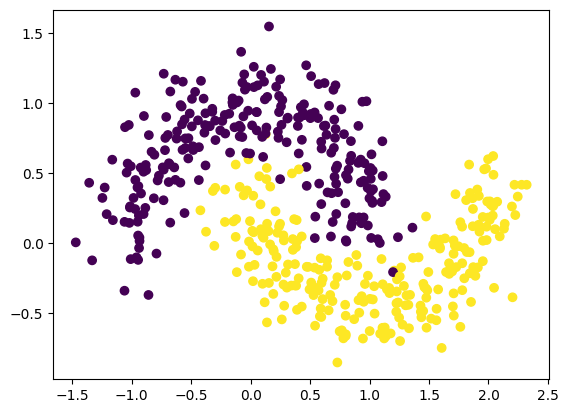

In [140]:
moons_X = moons.loc[:, moons.columns!='Class'].to_numpy() # strip away the class
moons_y = moons['Class'].to_numpy()

plt.scatter(moons_X[:,0], moons_X[:,1], c=moons_y)


In [142]:
# split and do some logistic regression

moons_X_train, moons_X_rest, moons_y_train, moons_y_rest = train_test_split(moons_X,moons_y,train_size=0.7) # split into 70% train 30% between test & validation
moons_X_valid, moons_X_test, moons_y_valid, moons_y_test = train_test_split(moons_X_rest, moons_y_rest,train_size=0.5) # split the remainer in half into validation and test sets

lr_moons_model = Perceptron()

lr_moons_model.fit(moons_X_train, moons_y_train)

moons_preds = lr_moons_model.predict(moons_X_valid)

print(moons_preds, moons_y_valid)
print(accuracy(moons_preds, moons_y_valid))

[0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1] [0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1]
Accuracy: 89.33%


In [ ]:
nodes = np.arrange(Perceptron())

In [ ]:
# Part 3 - Building some sort of Neural net

class Layer(BaseEstimator):
    
    def __init__(self, n_inputs, n_outputs, activation) -> None:
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.Nodes = [Perceptron(activation_fn=activation) for _ in range(n_outputs)]

    def fit(self, X, y):
        for node in self.Nodes:
            node.fit(X,y)
    
    def predict(self, X):
        pred = [ node.predict(X) for node in self.Nodes ]
        return np.asarray(pred)
    
    # TODO: implement me! :D
    def update_weights(self):
        pass
        
class NeuralNet:
    
    def __init__(self, layers):
        self.layers = layers
        self.weights = []
        self.bias = [1]
    
    def add_layer(self, n_inputs, n_outputs, activation):
        self.layers.append(Layer(n_inputs, n_outputs, activation))
        self.weights.append((n_inputs, n_outputs))
        
    def forward_prop(self, X):
        z = self.layers[0].predict(X):